# <center>UrbanSound8K</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-of-Required-Libraries" data-toc-modified-id="Import-of-Required-Libraries-1">Import of Required Libraries</a></span></li><li><span><a href="#Creation-the-Dataset-Class" data-toc-modified-id="Creation-the-Dataset-Class-2">Creation the Dataset Class</a></span></li><li><span><a href="#Creation-of-the-Transforms-for-Audio-Pre-Processing" data-toc-modified-id="Creation-of-the-Transforms-for-Audio-Pre-Processing-3">Creation of the Transforms for Audio Pre-Processing</a></span></li><li><span><a href="#Creation-of-the-Model" data-toc-modified-id="Creation-of-the-Model-4">Creation of the Model</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-5">Test</a></span></li><li><span><a href="#Dataset-Exploration" data-toc-modified-id="Dataset-Exploration-6">Dataset Exploration</a></span><ul class="toc-item"><li><span><a href="#Classes-Counts" data-toc-modified-id="Classes-Counts-6.1">Classes Counts</a></span></li><li><span><a href="#Duration-of-Events" data-toc-modified-id="Duration-of-Events-6.2">Duration of Events</a></span></li><li><span><a href="#Analysis-of-Salience" data-toc-modified-id="Analysis-of-Salience-6.3">Analysis of Salience</a></span><ul class="toc-item"><li><span><a href="#Global" data-toc-modified-id="Global-6.3.1">Global</a></span></li><li><span><a href="#Per-Class" data-toc-modified-id="Per-Class-6.3.2">Per Class</a></span></li></ul></li><li><span><a href="#Folds-Distribution" data-toc-modified-id="Folds-Distribution-6.4">Folds Distribution</a></span></li></ul></li></ul></div>

## Import of Required Libraries

In [68]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
import torchaudio
import torchaudio.transforms as transforms
from random import randint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Creation the Dataset Class

In [3]:
class UrbanSoundDataset(Dataset):
    
    def __init__(self, annotations_file, dataset_path, transform, target_sample_rate):
        self.annotations = pd.read_csv(os.path.join(dataset_path, annotations_file))
        self.dataset_path = dataset_path
        self.transform = transform
        self.target_sample_rate = target_sample_rate
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        audio_path = self._get_audio_sample_path(index)
        label = self._get_audio_sample_label(index)
        signal, sr = torchaudio.load(audio_path)
        signal = self._mix_down_if_necessary(signal)
        signal = self._resample_if_necessary(signal, sr)
        if self.transform:
            signal = self.transform(signal)
        return signal, label
        
    def _get_audio_sample_path(self, index):                                       
        fold = f"fold{self.annotations.iloc[index, 5]}"
        path = os.path.join(self.dataset_path, fold, self.annotations.iloc[index, 0])
        return path
    
    def _get_audio_sample_label(self, index):
        return self.annotations.iloc[index, 6]
    
    def _mix_down_if_necessary(self, signal):
        # If signal has multiple channels, mix down to mono
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal
        
    def _resample_if_necessary(self, signal, sr):
        if sr != self.target_sample_rate:
            resampler = torchaudio.transforms.Resample(sr, self.target_sample_rate)
            signal = resampler(signal)
        return signal
        

## Creation of the Transforms for Audio Pre-Processing

## Creation of the Model

## Test

In [5]:
if __name__ == "__main__":
    
    annotations_file = "UrbanSound8K.csv"
    dataset_path = "dataset"
    target_sample_rate = 16000

    mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(
        sample_rate = target_sample_rate,
        n_fft = 1024,
        hop_length = 512,
        n_mels = 64
    )
    
    dataset = UrbanSoundDataset(annotations_file, dataset_path, mel_spectrogram_transform, target_sample_rate)
    
    print(f"There are {len(dataset)} samples in the dataset")
    
    signal, label = dataset[0]
    print(signal)
    print(label)

There are 8732 samples in the dataset
tensor([[[5.9251e-04, 8.3826e-04, 9.5454e-05, 1.0171e-03, 4.7913e-04,
          1.6122e-04, 9.2122e-05, 1.5897e-04, 5.1358e-05, 1.3561e-04],
         [1.1820e-03, 1.0683e-03, 1.1457e-03, 6.4868e-03, 4.1271e-03,
          1.4092e-03, 7.9711e-04, 5.6833e-04, 3.6605e-04, 6.6183e-04],
         [3.0207e-03, 3.7174e-03, 4.7081e-03, 5.5488e-03, 2.2803e-03,
          1.8242e-03, 2.9318e-03, 2.5542e-03, 2.2006e-03, 2.9955e-03],
         [1.5446e-03, 8.2651e-03, 5.8801e-03, 2.0114e-02, 1.0481e-03,
          7.9804e-04, 1.8259e-03, 1.8869e-03, 2.7578e-03, 3.2023e-03],
         [7.4168e-04, 3.5674e-03, 3.6354e-02, 5.9762e-02, 3.1322e-03,
          3.9149e-03, 5.1392e-04, 4.6461e-04, 6.8625e-04, 1.5702e-03],
         [1.9557e-03, 3.2061e-02, 1.3300e-01, 1.6585e-01, 3.4332e-02,
          9.3192e-03, 1.6575e-03, 1.2765e-03, 2.2374e-03, 1.1519e-03],
         [1.4192e-03, 7.4624e-02, 3.3315e-02, 9.7095e-02, 5.7332e-02,
          1.1877e-02, 1.0860e-02, 2.8192e-03, 

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


In [6]:
dataset.annotations

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


## Dataset Exploration

### Classes Counts

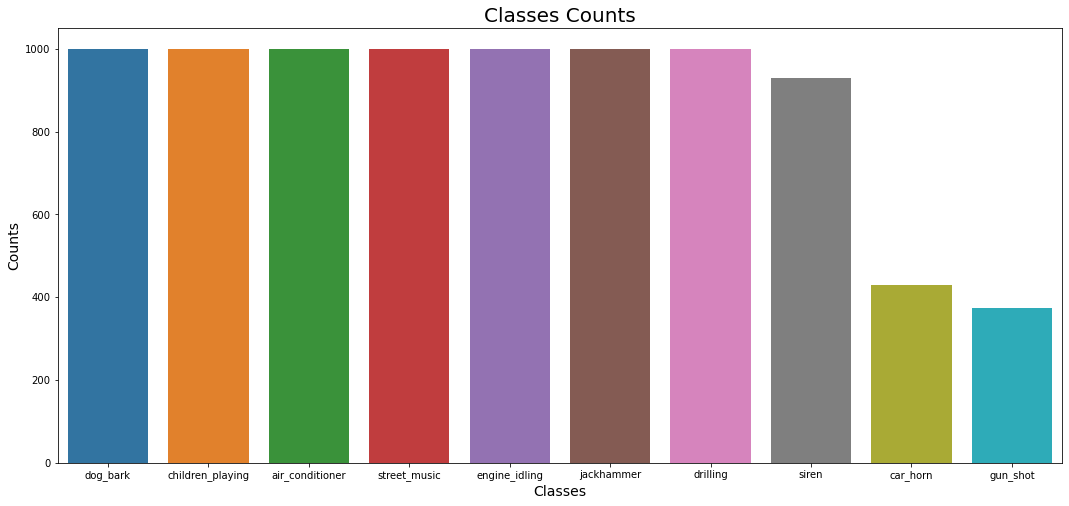

In [60]:
class_vc = dataset.annotations["class"].value_counts()
plt.figure(figsize=(18,8))
sns.barplot(x=class_vc.index, y=class_vc.values)
plt.title("Classes Counts", fontsize=20)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

### Duration of Events

Text(0, 0.5, 'Counts')

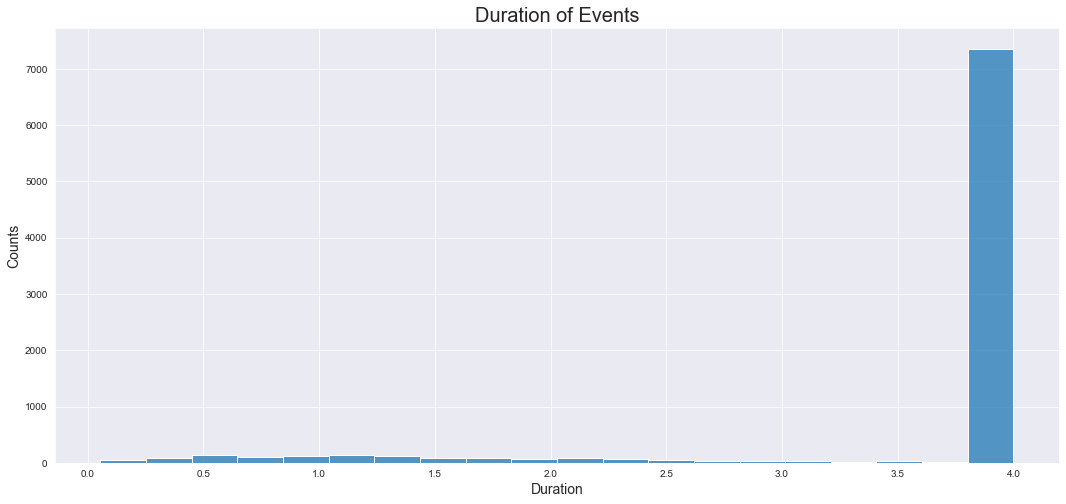

In [75]:
duration = dataset.annotations["end"] - dataset.annotations["start"]
plt.figure(figsize=(18,8))
sns.histplot(data=duration, x=duration.values, bins=20)
plt.title("Duration of Events", fontsize=20)
plt.xlabel("Duration", fontsize=14)
plt.ylabel("Counts", fontsize=14)

### Analysis of Salience

#### Global

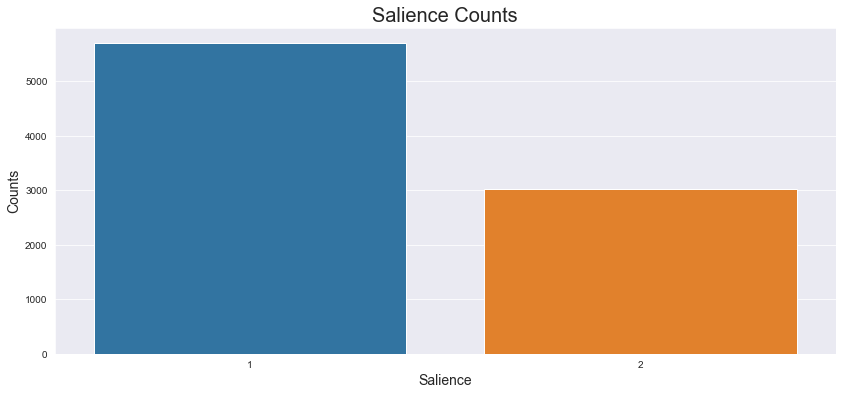

In [78]:
salience_vc = dataset.annotations["salience"].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=salience_vc.index, y=salience_vc.values)
plt.title("Salience Counts", fontsize=20)
plt.xlabel("Salience", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

#### Per Class

### Folds Distribution